<p style="background-color:palevioletred;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:40px 20px;"><b>SVM - Diabetes Dataset</b></p>

# <font color='palevioletred'> <b>Importing Libraries</b><font color='black'>  

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimpy import skim
import missingno as msno

from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix, PrecisionRecallDisplay, average_precision_score
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

plt.rcParams["figure.figsize"] = (8,6)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# <font color='palevioletred'> <b>Loading Dataset</b><font color='black'>  

In [5]:
df = pd.read_csv("diabetes.csv")
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [6]:
df.sample(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
476            2      105             80             45      191  33.7   
523            9      130             70              0        0  34.2   
599            1      109             38             18      120  23.1   
191            9      123             70             44       94  33.1   
318            3      115             66             39      140  38.1   

     DiabetesPedigreeFunction  Age  Outcome  
476                     0.711   29        1  
523                     0.652   45        1  
599                     0.407   26        0  
191                     0.374   40        0  
318                     0.150   28        0

**About Dataset**

This dataset contains data from diabetes studies on Pima Native American women living in Arizona.

The dataset includes the following features:

   1. **Pregnancies:** Number of pregnancies.<br>
   2. **Glucose:** 2-hour plasma glucose concentration in oral glucose tolerance test.<br>
   3. **Blood Pressure:** Blood pressure (mm Hg).<br>
   4. **Skin Thickness:** Triceps skinfold thickness (mm).<br>
   5. **Insulin:** 2-hour serum insulin (mu U/ml).<br>
   6. **BMI:** Body mass index (weight kg/(height m)^2).<br>
   7. **Diabetes Pedigree Function:** Diabetes pedigree function, a function that determines the likelihood of diabetes based on family history.<br>
   8. **Age:** Age (years).<br>
   9. **Outcome:** The class label (0 or 1) indicates whether the person has diabetes. 1 indicates that he has diabetes, 0 indicates that he does not have d

This dataset is widely used to train machine learning algorithms and for use in binary classification problems such as predicting diabetes. The dataset is used especially for data preprocessing, feature engineering and comparing the performance of classification algorithms.

Typical applications using the dataset include understanding which patient profiles are at risk for diabetes, determining which characteristics increase the likelihood of diabetes, and developing predictive models to help automatically diagnose diabetes.

It is important to note that the nature of the dataset may present challenges such as some features may be missing or it may have an unbalanced class distribution. Such challenges provide an opportunity to delve deeper into machine learning topics such as data cleaning, missing data imputation, handling imbalanced datasets, and model validation techniques.iabetes.<br>

# <font color='palevioletred'> <b>EDA</b><font color='black'>  

In [9]:
df.shape

(768, 9)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 768    │ │ int32       │ 7     │                                                          │
│ │ Number of columns │ 9      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name            ┃ NA  ┃ NA %  ┃ mean    ┃ sd     ┃ p0    ┃ p25    ┃ p50    ┃ p75    ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ Pregnancies            │   0 │     0 │   3.845 │   3.37 │     0 │      1 │      3 │      6 │   17 │  ▇▅▃▁  │  │
│ │ Glucose                │   0 │     0 │   120.9 │  31.97 │     0 │     99 │    117 │  140.2 │  199 │   ▅▇▃▂ │  │
│ │ BloodPressure          │   0 │     0 │   69.11 │  19.36 │     0 │     62 │     72 │     80 │  122 │ ▁ ▂▇▃  │  │
│ │ SkinThickness          │   0 │     0 │   20.54 │  15.95 │     0 │      0 │     23 │     32 │   99 │  ▇▇▅   │  │
│ │ Insulin                │   0 │     0 │    79.8 │  115.2 │     0 │      0 │   30.5 │  127.2 │  846 │   ▇▂   │  │
│ │ BMI                    │   0 │     0 │   31.99 │  7.884 │     0 │   27.3 │     32 │   36.6 │ 67.1 │  ▁▇▆▁  │  │
│ │ DiabetesPedigreeFuncti │   0 │     0 │  0.4719 │ 0.3313 │ 0.078 │ 0.2437 │ 0.3725 │ 0.6262 │ 2.42 │  ▇▃▁   │  │
│ │ on                     │     │       │         │        │       │        │        │        │      │        │  │
│ │ Age                    │   0 │     0 │   33.24 │  11.76 │    21 │     24 │     29 │     41 │   81 │  ▇▃▂▁  │  │
│ │ Outcome                │   0 │     0 │   0.349 │  0.477 │     0 │      0 │      0 │      1 │    1 │ ▇    ▅ │  │
│ └────────────────────────┴─────┴───────┴─────────┴────────┴───────┴────────┴────────┴────────┴──────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

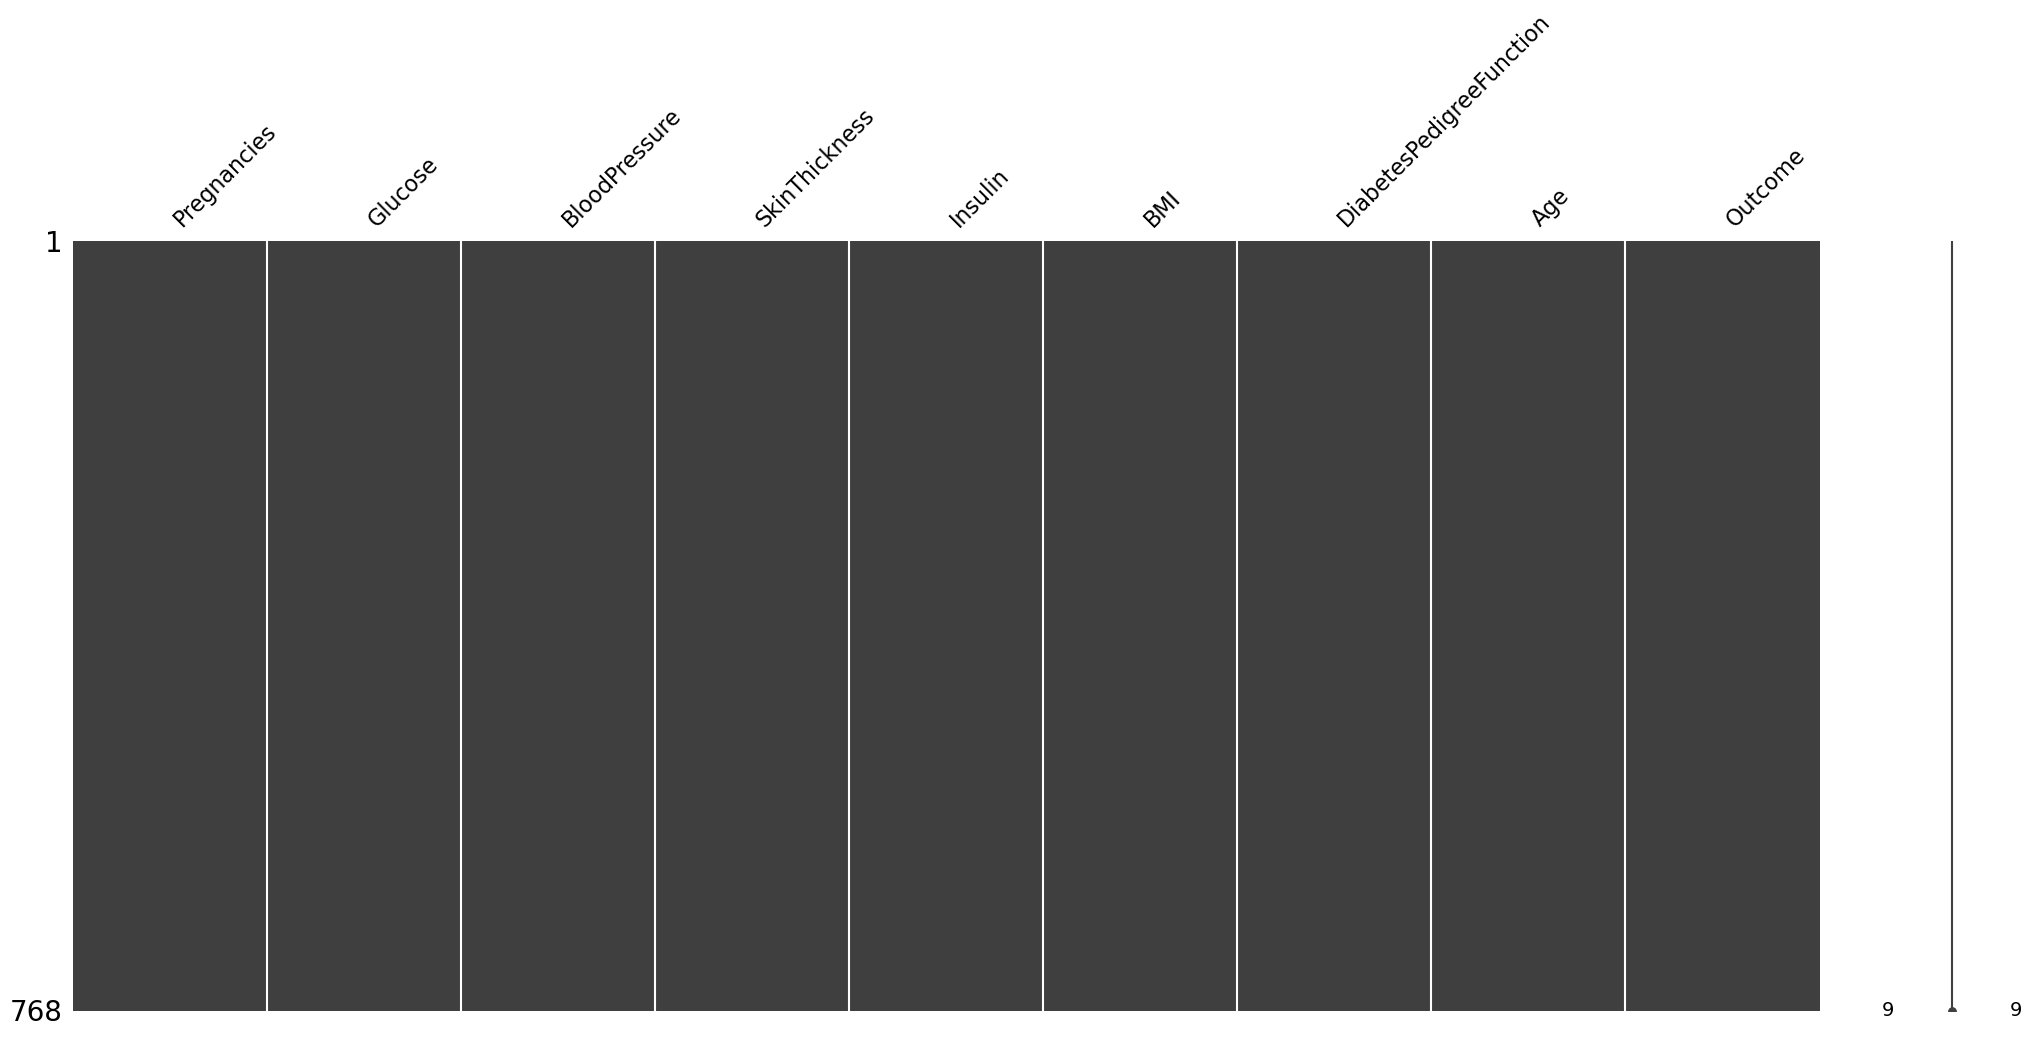

In [14]:
msno.matrix(df);

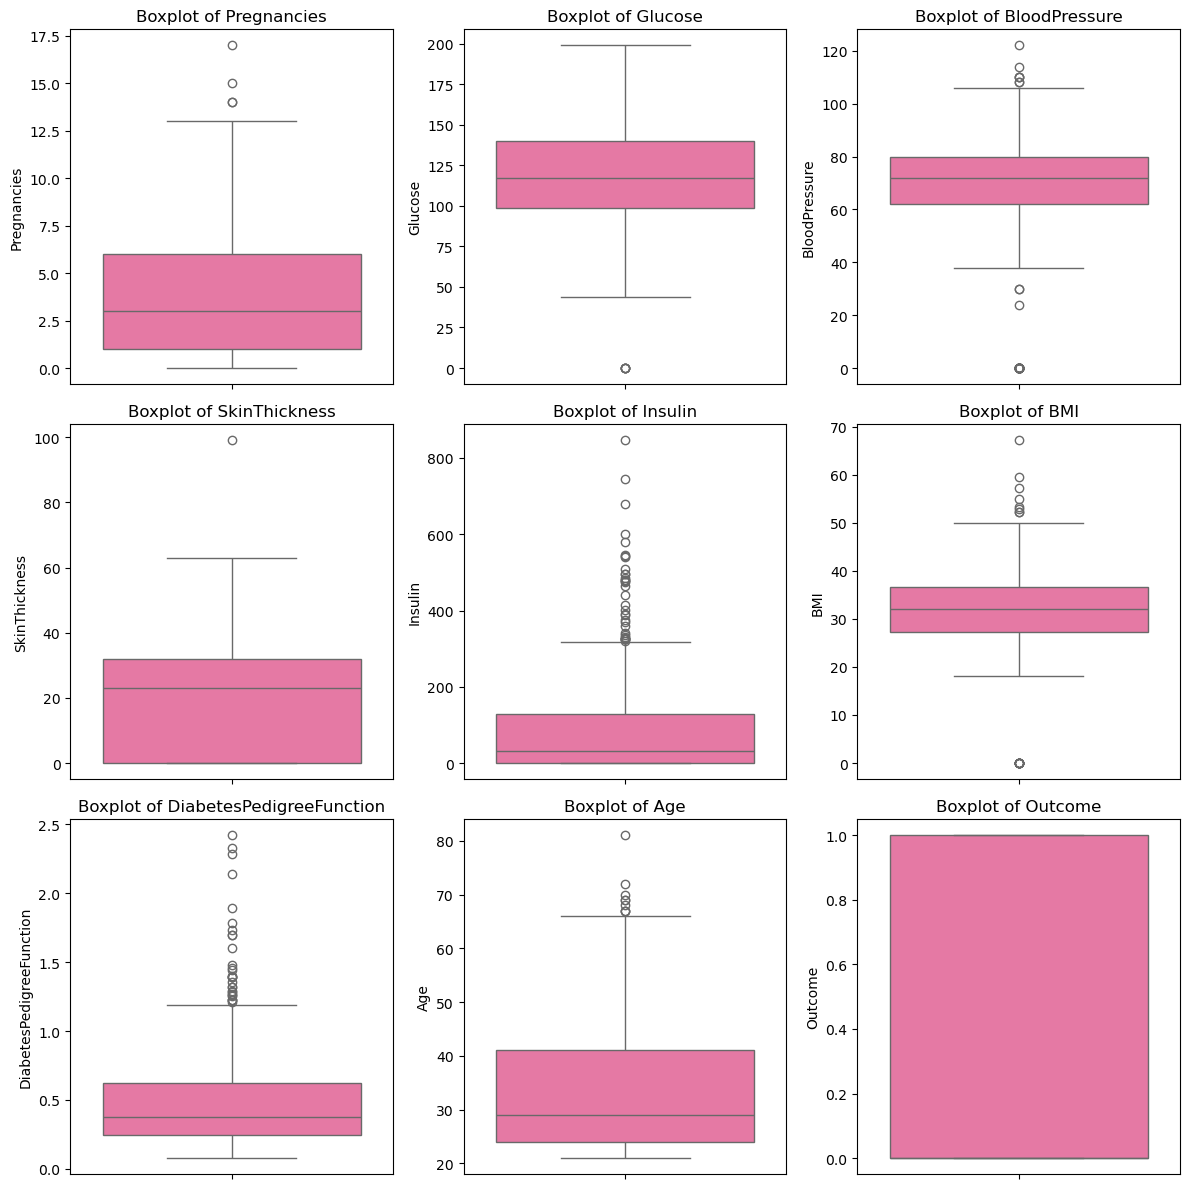

In [15]:
numeric_columns = df.select_dtypes(include="number").columns

n_cols = 3
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(4 * n_cols, 4 * n_rows))

axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.boxplot(y=df[col], ax=axes[i], palette='RdPu')
    axes[i].set_title(f"Boxplot of {col}")

for j in range(len(numeric_columns), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

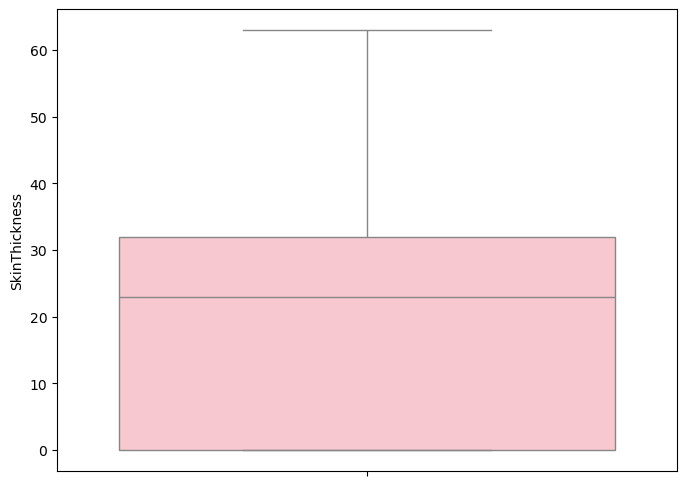

In [16]:
# Since the outliers in the skin thickness column are unusual, we take values ​​less than 70.
df = df[df.SkinThickness<70]
sns.boxplot(df.SkinThickness, color='pink');

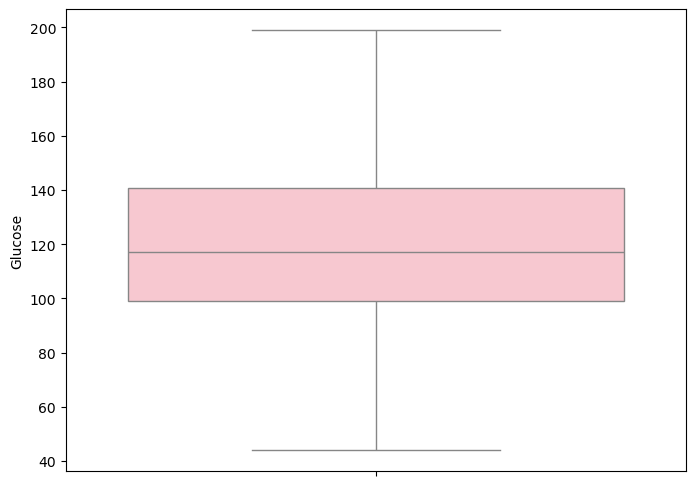

In [17]:
# Glucose value cannot be 0. That's why we take values ​​greater than 0.
df = df[df.Glucose>0]
sns.boxplot(df.Glucose, color='pink');

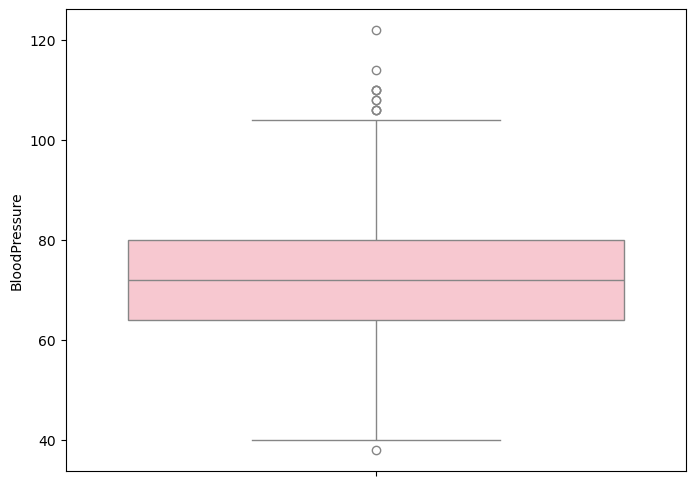

In [18]:
df = df[df.BloodPressure>35]
sns.boxplot(df.BloodPressure, color='pink');

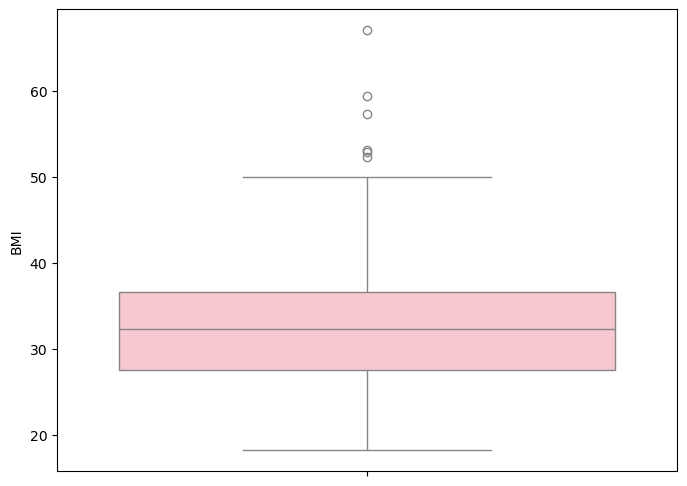

In [19]:
df = df[df.BMI>0]
sns.boxplot(df.BMI, color='pink');

In [20]:
df.shape

(720, 9)

In [21]:
df.Outcome.value_counts()

# this data is unbalanced data!!

Outcome
0    473
1    247
Name: count, dtype: int64

In [22]:
df.Outcome.value_counts(normalize = True)

Outcome
0    0.656944
1    0.343056
Name: proportion, dtype: float64

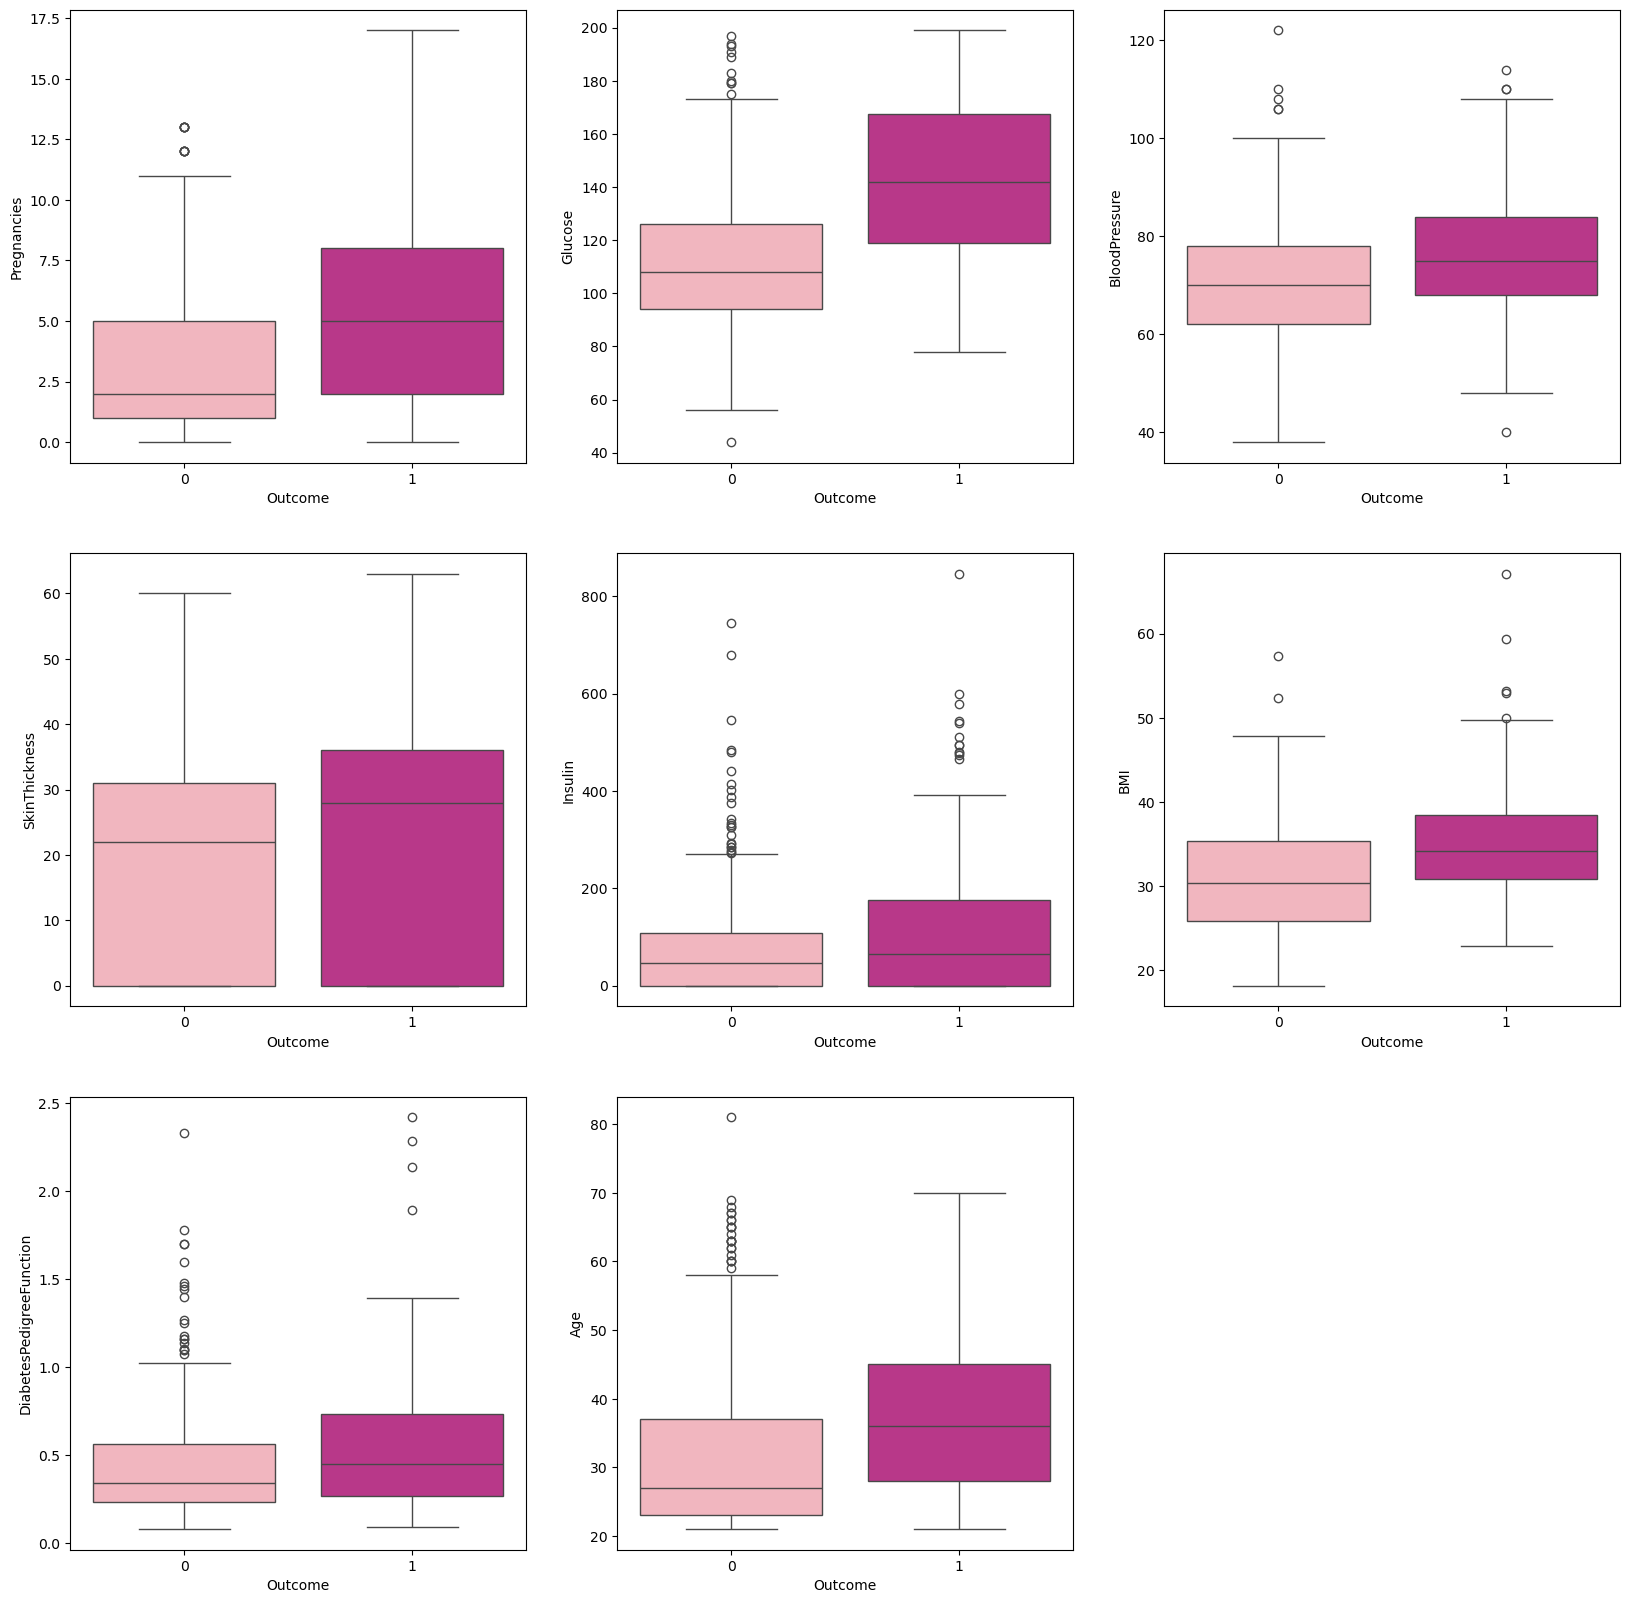

In [23]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Outcome":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Outcome',y=feature,data=df, palette='RdPu')
plt.show()

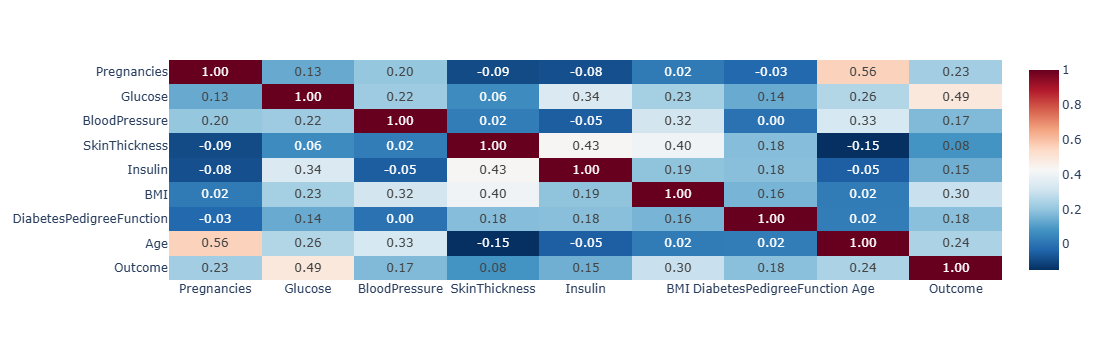

<Figure size 800x600 with 0 Axes>

In [24]:
import plotly.express as px
plt.figure(figsize=(8,6))

fig = px.imshow(df.corr(), text_auto='.2f', aspect="auto", color_continuous_scale='RdBu_r')
fig.show()

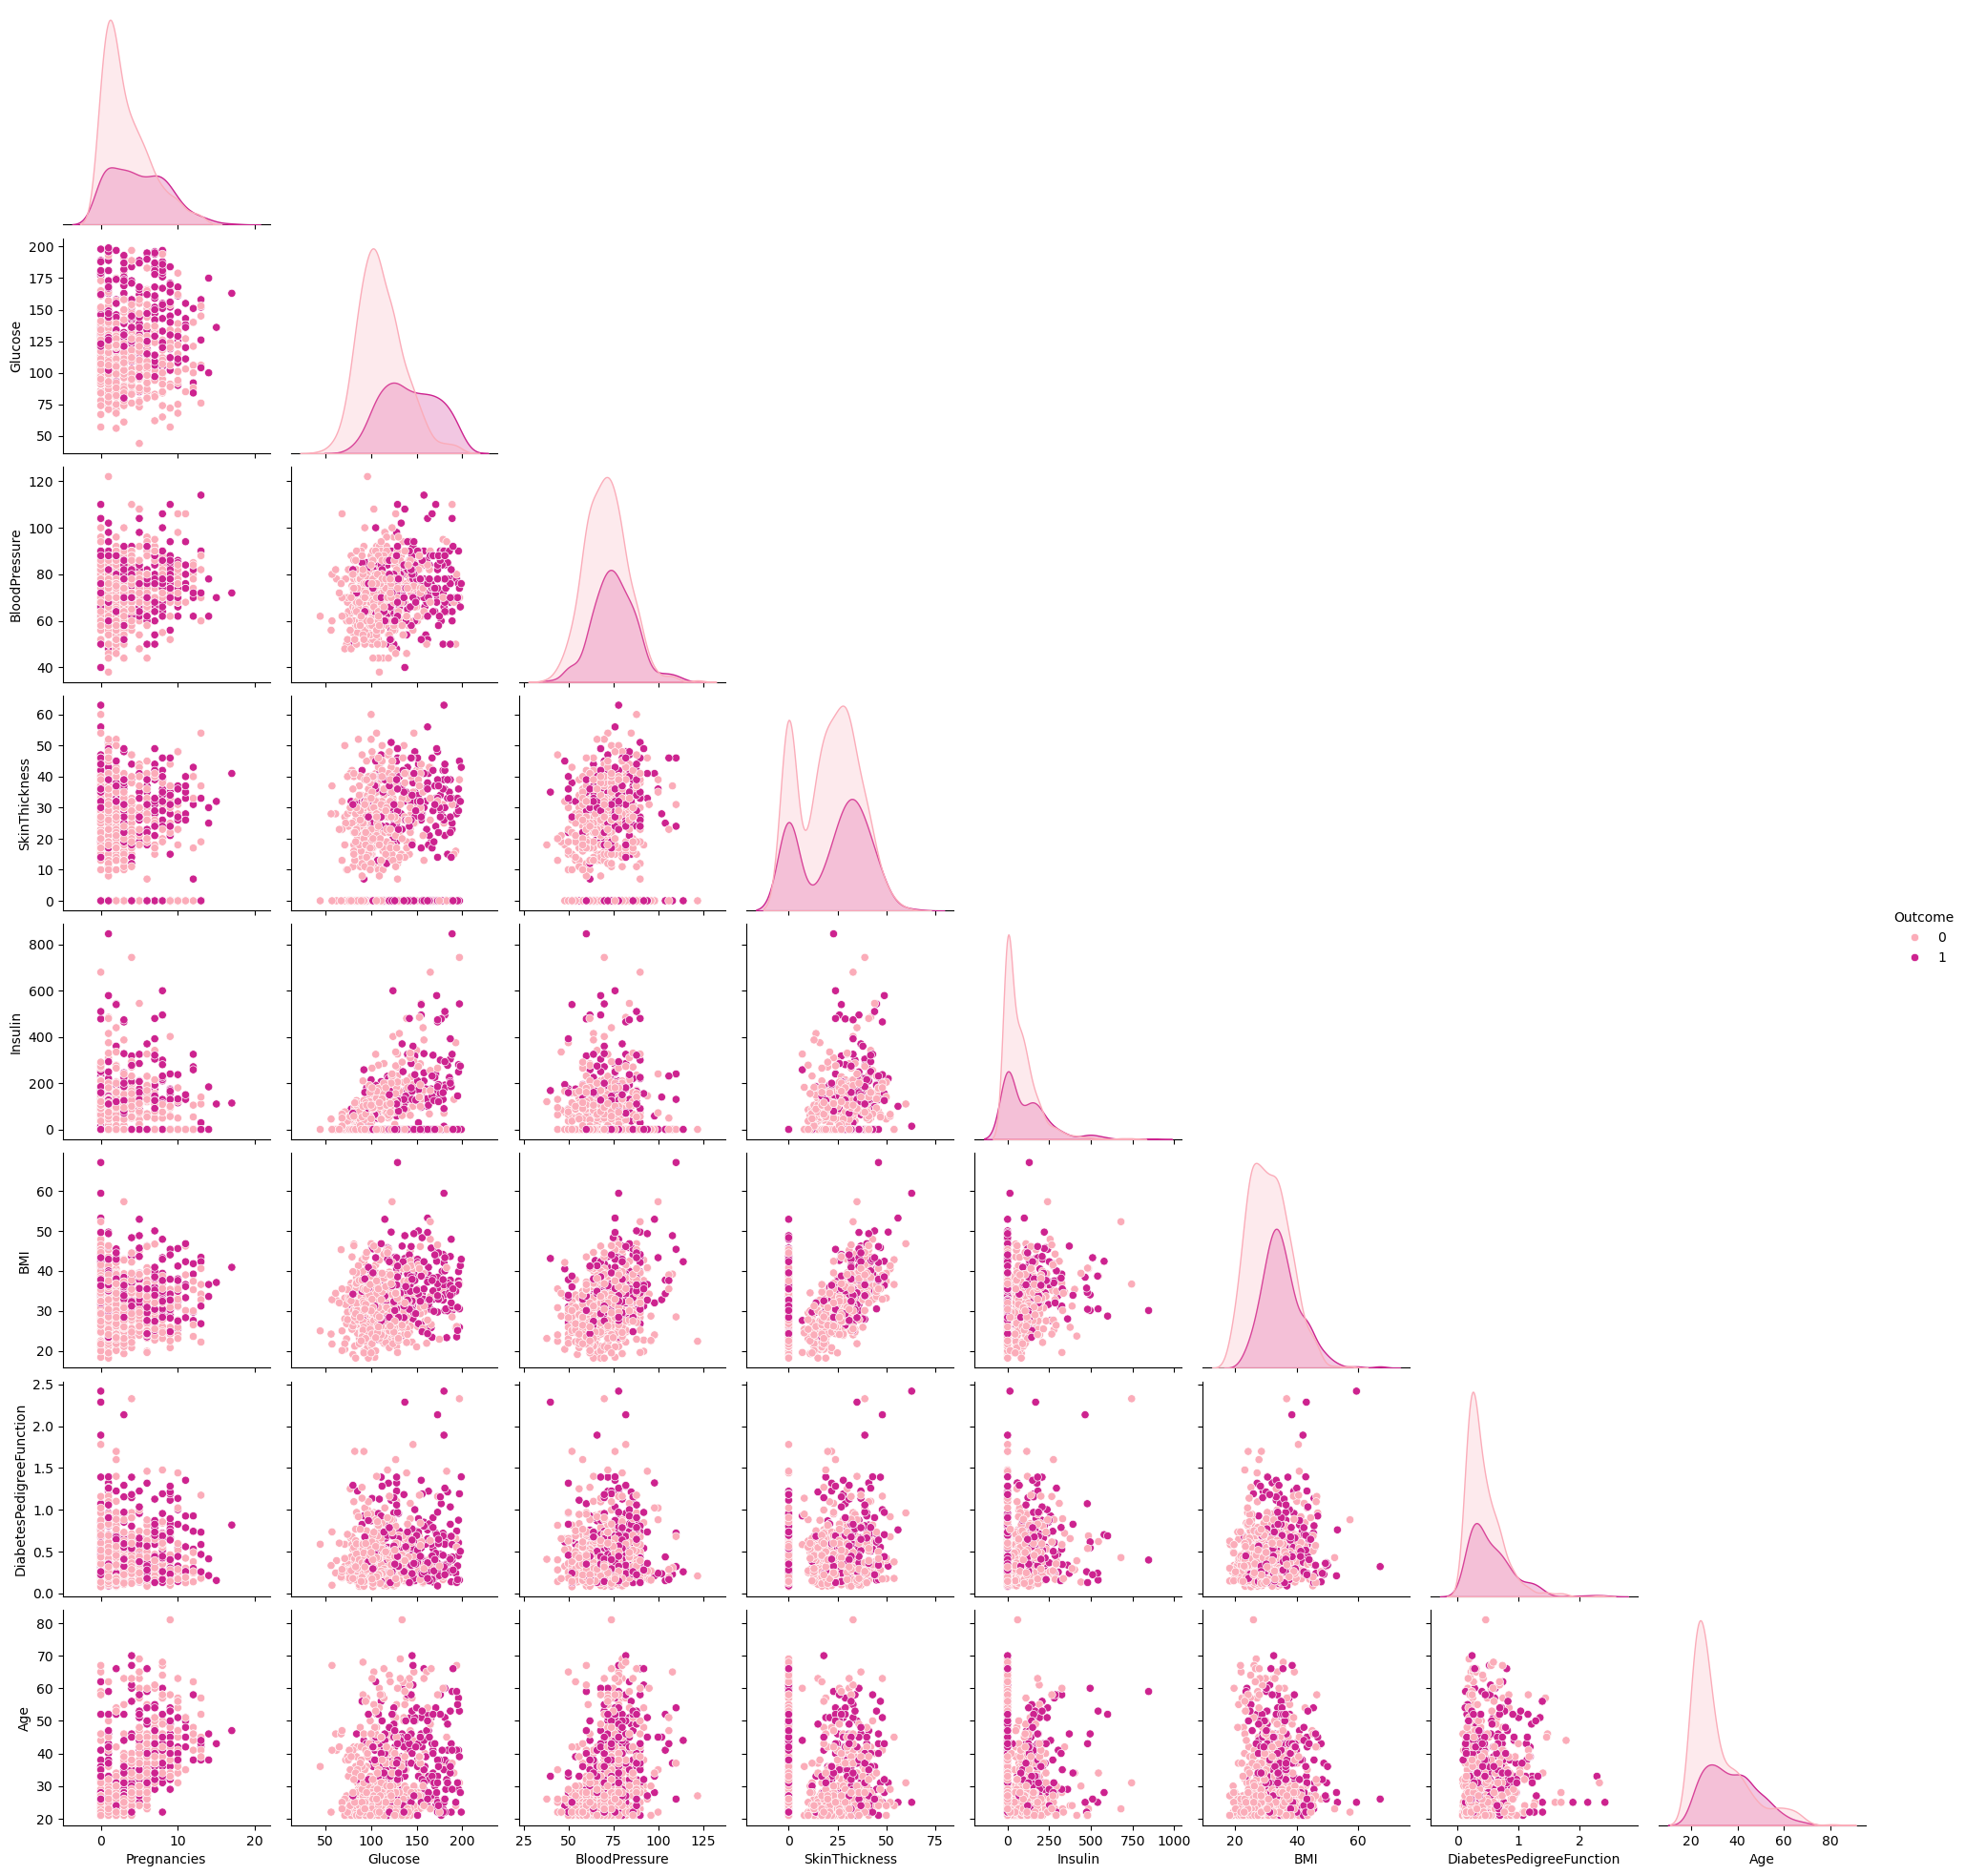

In [25]:
sns.pairplot(df, hue = "Outcome", corner=True, palette='RdPu');

# <font color='palevioletred'> <b>Defining X and y</b><font color='black'>  

In [27]:
X = df.drop(columns="Outcome")
y = df.Outcome

# <font color='palevioletred'> <b>Train-Test Split</b><font color='black'>  

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

# <font color='palevioletred'> <b>Modeling</b><font color='black'>  

In [31]:
# Since SVM is a distance-based model, the data needs to be scaled.
operations = [("scaler", StandardScaler()), ("SVC", SVC())]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('SVC', SVC())])

In [32]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[85 10]
 [20 29]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        95
           1       0.74      0.59      0.66        49

    accuracy                           0.79       144
   macro avg       0.78      0.74      0.75       144
weighted avg       0.79      0.79      0.79       144


Train_Set
[[347  31]
 [ 74 124]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       378
           1       0.80      0.63      0.70       198

    accuracy                           0.82       576
   macro avg       0.81      0.77      0.79       576
weighted avg       0.82      0.82      0.81       576



## <font color='pink'> <b>Cross Validation</b><font color='black'>  

In [34]:
operations = [("scaler", StandardScaler()), ("SVC", SVC())]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model,
                        X_train,
                        y_train,
                        scoring=['accuracy', 'precision', 'recall', 'f1'],
                        cv=10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.751785
train_accuracy     0.830634
test_precision     0.672696
train_precision    0.824515
test_recall        0.535789
train_recall       0.644231
test_f1            0.593820
train_f1           0.723120
dtype: float64

## <font color='pink'> <b>GridsearchCV</b><font color='black'>  

In [36]:
pipe_model.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('SVC', SVC())],
 'verbose': False,
 'scaler': StandardScaler(),
 'SVC': SVC(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'SVC__C': 1.0,
 'SVC__break_ties': False,
 'SVC__cache_size': 200,
 'SVC__class_weight': None,
 'SVC__coef0': 0.0,
 'SVC__decision_function_shape': 'ovr',
 'SVC__degree': 3,
 'SVC__gamma': 'scale',
 'SVC__kernel': 'rbf',
 'SVC__max_iter': -1,
 'SVC__probability': False,
 'SVC__random_state': None,
 'SVC__shrinking': True,
 'SVC__tol': 0.001,
 'SVC__verbose': False}

In [37]:
# Creating param_grid
param_grid = {'SVC__C': [0.001, 0.05, 0.01, 0.1, 0.5],
              'SVC__gamma': ["scale", "auto", 0.2, 0.3, 0.5],
              'SVC__kernel': ['rbf', 'linear'],
              'SVC__class_weight': ["balanced", None]}

# Model creating and fitting
operations = [("scaler", StandardScaler()), ("SVC", SVC(probability=True))]

pipe_model = Pipeline(steps=operations)

svm_model_grid = GridSearchCV(pipe_model,
                              param_grid,
                              scoring="recall",
                              cv=5,
                              return_train_score=True,
                              n_jobs=1).fit(X_train, y_train)

In [38]:
svm_model_grid.best_params_

{'SVC__C': 0.1,
 'SVC__class_weight': 'balanced',
 'SVC__gamma': 0.5,
 'SVC__kernel': 'rbf'}

In [39]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[39 56]
 [ 2 47]]
              precision    recall  f1-score   support

           0       0.95      0.41      0.57        95
           1       0.46      0.96      0.62        49

    accuracy                           0.60       144
   macro avg       0.70      0.68      0.60       144
weighted avg       0.78      0.60      0.59       144


Train_Set
[[174 204]
 [ 10 188]]
              precision    recall  f1-score   support

           0       0.95      0.46      0.62       378
           1       0.48      0.95      0.64       198

    accuracy                           0.63       576
   macro avg       0.71      0.70      0.63       576
weighted avg       0.79      0.63      0.63       576



## <font color='pink'> <b>Prediction</b><font color='black'>  

In [41]:
decision_function = svm_model_grid.decision_function(X_test)
decision_function

# SVC performs the prediction process through the decision_function function. 
# Positive values ​​indicate class 1, while negative values ​​indicate class 0. 
# The larger the value, the further away the observation is from the hyperplane.

array([ 0.63906031,  0.79176295,  0.73519068, -0.20225419,  0.73316814,
       -0.57631943,  0.14825358,  0.85812815, -1.04880001,  0.1844397 ,
        0.26680333,  0.47775977,  0.11396222, -0.4017274 ,  0.89937631,
        0.6278782 , -1.08504776,  0.95010194,  0.70130479, -1.20395382,
        0.74770131, -0.07649685,  0.98603743,  0.26873278, -0.11500394,
        0.59273926, -0.52231513,  0.47599842, -0.05154567, -0.24826285,
        0.62556277,  0.50165338,  0.61702153,  0.16478031,  0.63058378,
       -0.09905568,  0.7150412 ,  0.49701597,  0.65528673,  0.41153283,
        0.49320867, -0.98788463, -0.77986735,  0.85614723,  0.63227463,
        0.22172904,  0.59437648,  0.65216303,  0.96705383,  0.48881574,
        0.62548838, -0.76023745,  0.13982543, -0.44174264, -0.71059951,
        0.94776704,  0.63522658, -1.36076657,  0.72029338,  0.94844814,
        0.73322563,  0.65687659,  0.87010536,  0.96131497,  1.01536471,
       -0.9035248 ,  0.66032752,  0.13228042,  0.67700769, -0.61

In [42]:
predict_proba = svm_model_grid.predict_proba(X_test)[:,1]
predict_proba

# According to prediction_proba, those above 0.5 should be assigned to class 1, those below 0.5 should be assigned to class 0. 
# However, the 7th observation was assigned to class 1 even though it was 0.25. 
# As you can see, we do not use predict_proba because predict_proba does not work properly in SVC.

array([0.49288036, 0.56344904, 0.53737847, 0.16964945, 0.53644461,
       0.0926617 , 0.2812354 , 0.59397537, 0.04218558, 0.29499223,
       0.3311856 , 0.41912326, 0.2685658 , 0.1236946 , 0.61299745,
       0.48770015, 0.03948306, 0.636542  , 0.52171537, 0.0317515 ,
       0.54315197, 0.20505665, 0.64902321, 0.33192869, 0.19366507,
       0.47144837, 0.10142904, 0.41833871, 0.21269943, 0.15797075,
       0.48662783, 0.429829  , 0.48267358, 0.2874698 , 0.48895331,
       0.19832374, 0.52806904, 0.42774241, 0.5       , 0.39013373,
       0.42603237, 0.047136  , 0.0654426 , 0.59306352, 0.48973655,
       0.30956953, 0.47220423, 0.5       , 0.64446325, 0.42406281,
       0.48659339, 0.06770372, 0.27808793, 0.11587568, 0.07374816,
       0.63545326, 0.4911041 , 0.02379037, 0.53049689, 0.6357708 ,
       0.53647116, 0.5       , 0.59949124, 0.64177822, 0.66130509,
       0.05492305, 0.5       , 0.27528871, 0.51046522, 0.08720197,
       0.47240067, 0.41270551, 0.53444774, 0.39655769, 0.54815

## <font color='pink'> <b>PRC</b><font color='black'>  

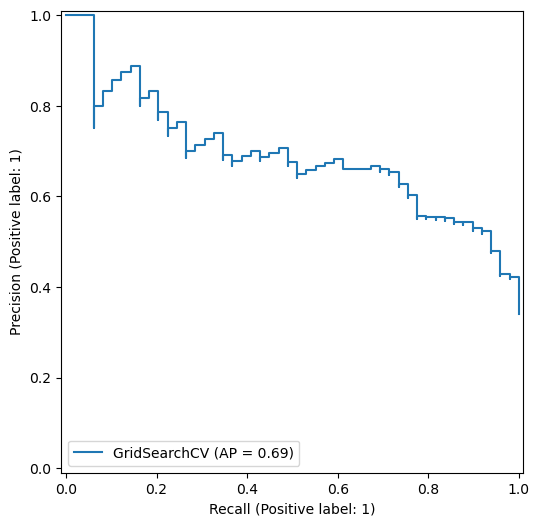

In [44]:
PrecisionRecallDisplay.from_estimator(svm_model_grid, X_test, y_test);

In [45]:
average_precision_score(y_test, decision_function)

0.6916071833158592

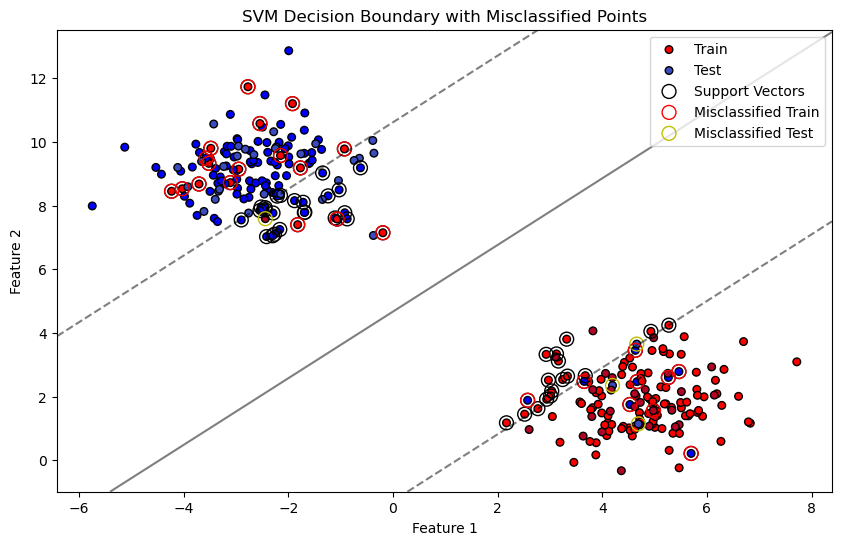

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

# Creating sample data and ensuring some points are misclassified
X1, y1 = make_blobs(n_samples=300, centers=2, random_state=42, cluster_std=1.0)
y1[::10] = 1 - y1[::10]  # Her 10. örneğin sınıfını değiştirerek yanlış sınıflandırma sağlama

# Separating the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Creating and training the SVM model
model = svm.SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)

# Plotting
def plot_svm_decision_boundary_with_errors(model, X_train, y_train, X_test, y_test):
    plt.figure(figsize=(10, 6))

    # Plotting training data
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', s=30, edgecolors='k', label='Train')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', s=30, edgecolors='k', label='Test')

    # Plotting support vectors
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')

    # Plotting decision boundaries and margins
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create meshgrid for decision boundary
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # Plot decision boundaries and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    # Identify and plot misclassified points
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    misclassified_train = (y_train != y_train_pred)
    misclassified_test = (y_test != y_test_pred)

    plt.scatter(X_train[misclassified_train, 0], X_train[misclassified_train, 1], facecolors='none', edgecolors='r', s=100, label='Misclassified Train')
    plt.scatter(X_test[misclassified_test, 0], X_test[misclassified_test, 1], facecolors='none', edgecolors='y', s=100, label='Misclassified Test')

    # Show chart
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundary with Misclassified Points')
    plt.legend()
    plt.show()

# Call the chart
plot_svm_decision_boundary_with_errors(model, X_train, y_train, X_test, y_test)

## <font color='pink'> <b>Comparing SVM and Logistic Regression Scores</b><font color='black'>  

In [81]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, StratifiedKFold

operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
class_weight= ["balanced", None]

# We can use class_weight= "balanced" to balance classes in unbalanced data sets. 
# When the data is balanced, the model tries to increase the recall score of that class by increasing the precision score of the less class.

# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data
solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"logistic__penalty" : penalty,
              "logistic__C" : C,
              "logistic__class_weight":class_weight,
              "logistic__solver":solver}



cv = StratifiedKFold(n_splits = 10) #shuffle = True, random_state = 42

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=cv,
                          scoring = "recall",   # By default, it maximizes the score of class 1.If you want to maximize that of class 0, f1_0 = make_scorer(f1_score, pos_label =0)
                          n_jobs = -1,
                          return_train_score=True)

# Since GridsearchCV also performs Cross Validation, we specify return_train_score=True to obtain validation and train set scores.

In [83]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'logistic__class_weight': ['balanced', None],
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['lbfgs', 'liblinear', 'sag',
                                              'saga']},
             return_train_score=True, scoring='recall')

In [85]:
grid_model.best_params_

{'logistic__C': 0.1,
 'logistic__class_weight': 'balanced',
 'logistic__penalty': 'l1',
 'logistic__solver': 'liblinear'}

In [87]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[28  3]
 [ 1 28]]
              precision    recall  f1-score   support

           0       0.97      0.90      0.93        31
           1       0.90      0.97      0.93        29

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.94      0.93      0.93        60


Train_Set
[[104   9]
 [ 17 110]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       113
           1       0.92      0.87      0.89       127

    accuracy                           0.89       240
   macro avg       0.89      0.89      0.89       240
weighted avg       0.89      0.89      0.89       240



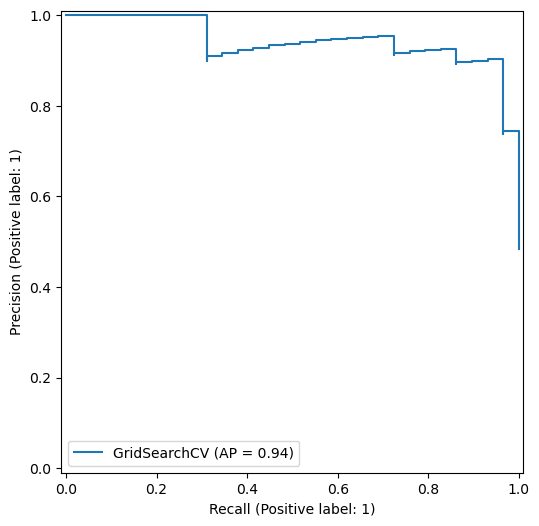

In [89]:
PrecisionRecallDisplay.from_estimator(grid_model, X_test, y_test);

**For the dataset in this project, the logistic regression score was better than the SVM score.**

# <font color='palevioletred'> <b>Final Model</b><font color='black'>  

In [91]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression(C=0.1, class_weight='balanced',
                                                         penalty='l1', solver='liblinear'))]
final_model = Pipeline(steps=operations)

final_model.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    penalty='l1', solver='liblinear'))])

In [93]:
import pickle

In [95]:
pickle.dump(final_model, open("final_model", "wb"))

# <font color='palevioletred'> <b>Prediction</b><font color='black'>  

In [97]:
new_model = pickle.load(open("final_model", "rb"))

In [99]:
my_dict = {"Pregnancies": [3, 4, 5],
           "Glucose": [100, 110, 120],
           "BloodPressure": [75, 80, 70],
           "SkinThickness": [30, 25, 20],
           "Insulin": [80, 120, 130],
           "BMI": [25, 35, 30],
           "DiabetesPedigreeFunction": [0.4, 0.5, 0.6],
           "Age": [30, 40, 35]
          }

sample = pd.DataFrame(my_dict)
sample

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
0            3      100             75             30       80   25   
1            4      110             80             25      120   35   
2            5      120             70             20      130   30   

   DiabetesPedigreeFunction  Age  
0                       0.4   30  
1                       0.5   40  
2                       0.6   35

In [101]:
predictions = new_model.predict(sample)
predictions

array([0, 0, 0], dtype=int64)

In [103]:
predictions_proba = new_model.predict_proba(sample)
predictions_proba

array([[0.82608662, 0.17391338],
       [0.55553457, 0.44446543],
       [0.5379772 , 0.4620228 ]])

In [105]:
sample["pred_proba"] = predictions_proba[:,1]
sample["pred"] = predictions
sample

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
0            3      100             75             30       80   25   
1            4      110             80             25      120   35   
2            5      120             70             20      130   30   

   DiabetesPedigreeFunction  Age  pred_proba  pred  
0                       0.4   30    0.173913     0  
1                       0.5   40    0.444465     0  
2                       0.6   35    0.462023     0

<p style="background-color:palevioletred;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:40px 20px;"><b>THANK YOU!</b></p>